For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __Anisha Thakrar, Kavya Gajjar__

Step 1: Train your own word embeddings
--------------------------------

(describe the provided dataset that you have chosen here)

Describe what data set you have chosen to compare and contrast with the your chosen provided dataset. Make sure to describe where it comes from and it's general properties.

(describe your dataset here)

In [75]:
from string import punctuation # to remove punctuation from corpus
import nltk 
import numpy as np
import re
from keras.preprocessing import text
from keras.preprocessing.sequence import skipgrams 
from keras.layers import *
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model,Sequential 

from sklearn.metrics.pairwise import euclidean_distances

### a) Train embeddings on GIVEN dataset

In [76]:
def pre_process(data):
    norm_data = [[word.lower() for word in sent.split()] for sent in data]
    norm_data = [' '.join(tok_sent) for tok_sent in norm_data]
    norm_data = ['<s> '+ sent + ' </s>' for sent in norm_data]
    norm_data = [[word for word in sent.split()] for sent in norm_data]
    return norm_data

def tokenize_data(norm_data):
    tokenizer = text.Tokenizer()
    tokenizer.fit_on_texts(norm_data)
    word_id = tokenizer.word_index
    id_word = {v:k for k, v in word_id.items()}
    vocab_size = len(word_id) + 1
    return word_id, id_word, vocab_size

with open('shakespeare_plays.txt') as f:
    data = f.readlines()


In [77]:
# data = data[:int(len(data)/2)]

In [78]:
data = pre_process(data)
# word2id , id2word, vocab_size = tokenize_data(data)
# wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in data]
# print('Vocabulary Size:', vocab_size)
# print('Vocabulary Sample:', list(word2id.items())[:5]) 

In [79]:
from gensim.models import Word2Vec

EMBEDDINGS_SIZE = 200
model = Word2Vec(sentences = data,sg = 1, window=5, min_count=1, 
                 workers=4, vector_size = EMBEDDINGS_SIZE)

### b) Train embedding on YOUR dataset

In [80]:
with open('new_data.csv', encoding = 'ISO-8859-1') as f:
    new_data = f.readlines()

In [81]:
new_data = new_data[:int(len(new_data)/100)]

In [8]:
len(new_data)

1000

In [9]:
new_data = pre_process(new_data)
# word2id_1 , id2word_1, vocab_size_1 = tokenize_data(new_data)
# wids_1 = [[word2id_1[w] for w in text.text_to_word_sequence(doc)] for doc in new_data]
# print('Vocabulary Size:', vocab_size_1)
# print('Vocabulary Sample:', list(word2id_1.items())[:5]) 

In [10]:
# skip_grams_1 = [skipgrams(wid, vocabulary_size=vocab_size_1, window_size=5) for wid in wids_1]
# # view sample skip-grams
# pairs, labels = skip_grams_1[0][0], skip_grams_1[0][1]
# for i in range(10):
#     print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
#        id2word_1[pairs[i][0]], pairs[i][0], 
#        id2word_1[pairs[i][1]], pairs[i][1], 
#        labels[i])) 

In [11]:
from gensim.models import Word2Vec

EMBEDDINGS_SIZE = 200

model_1 = Word2Vec(sentences = new_data,sg = 1, window=5, min_count=1, workers=4, vector_size = EMBEDDINGS_SIZE)

What text-normalization and pre-processing did you do and why? __YOUR ANSWER HERE__

Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

In [12]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (15,10)

In [13]:
v1 = list(model.wv.key_to_index)
v2 = list(model_1.wv.key_to_index)

In [14]:
v1 = set(v1)
intersection = v1.intersection(v2)
intersection_as_list = list(intersection)
vocab = intersection_as_list[:300]


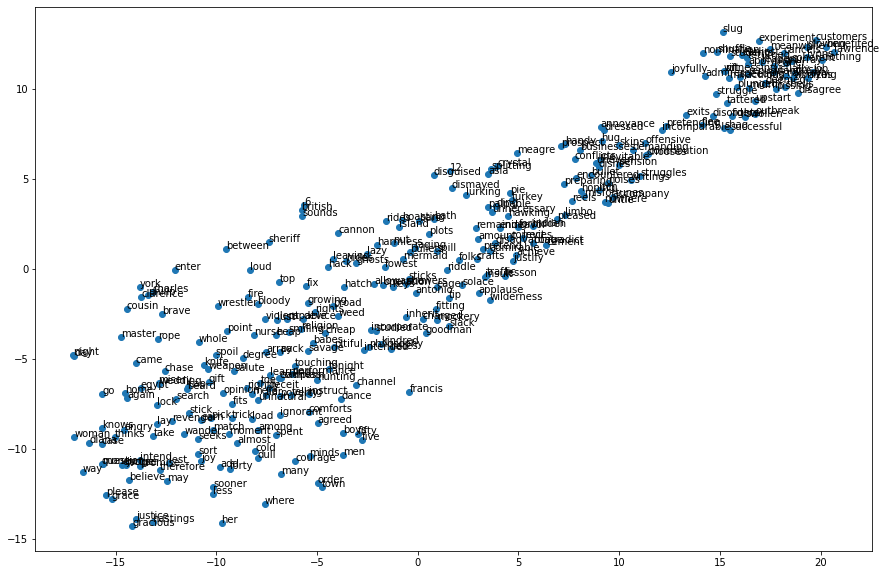

In [15]:
# vocab = list(model.wv.key_to_index)
X = model.wv[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos,fontsize=10)
plt.show()

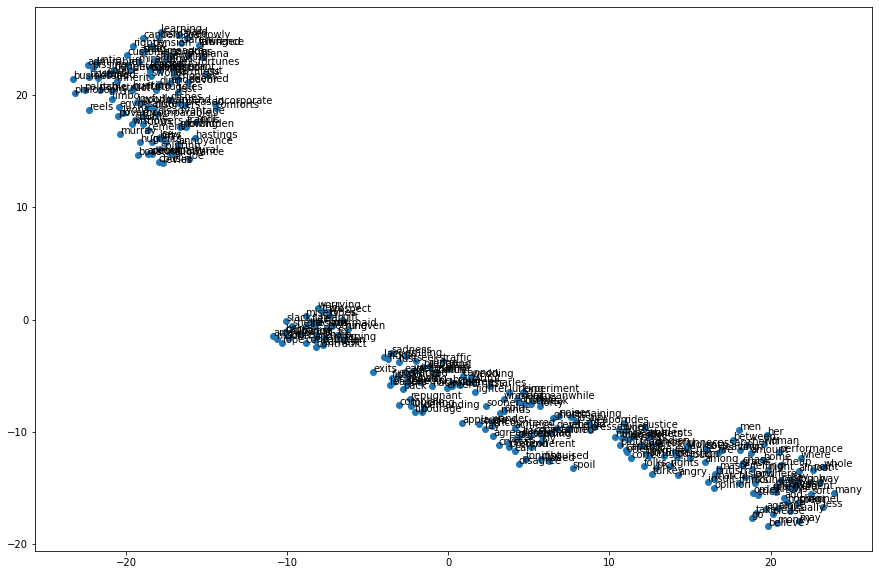

In [16]:
# vocab = list(model_1.wv.key_to_index)
X = model_1.wv[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos,fontsize=10)
plt.show()

In [17]:
def pp(model, tag, top):
    for word, val in model.wv.most_similar(tag, topn = top):
        print(word,'->', round(val,4))

In [18]:
print("Shakespeare dataset")
word = 'love'
pp(model,word, 10)
print("\n")
print("*"*20)
print("IMDB dataset")
pp(model_1,word, 10)

Shakespeare dataset
hate -> 0.8778
dearly -> 0.8671
blame -> 0.854
duty -> 0.8528
reverence -> 0.8487
believe -> 0.8467
youth -> 0.8447
sake -> 0.8439
desire -> 0.8439
sad -> 0.8416


********************
IMDB dataset
comment -> 0.9856
went -> 0.9842
bought -> 0.9842
agree -> 0.9837
, -> 0.9831
forward -> 0.9829
review -> 0.982
sorry -> 0.9813
comments -> 0.9811
kept -> 0.981


##Write down your analysis:

Cite your sources:
-------------

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [82]:
from tensorflow.keras.utils import to_categorical

In [88]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding

# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 3 

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=23000)
tokenizer.fit_on_texts(data)
numeric_sentences = tokenizer.texts_to_sequences(data)
padded=pad_sequences(numeric_sentences,padding="post",truncating='post',maxlen=50)



In [89]:
max([max(w) for w in numeric_sentences])

22999

In [90]:
vocabulary_size = len(tokenizer.word_index)
data_array = np.array(padded)
X = np.array([d[:-1] for d in data_array])
y = np.array([d[-1] for d in data_array])
# print(X,y)
y = to_categorical(y, num_classes=vocabulary_size)
input_length = X.shape[1]
print("Vocabulary Size: ", vocabulary_size)
print("Shape of X: ",X.shape)
print("Shape of y: ", y.shape)
print("Input length: ", input_length)

Vocabulary Size:  23857
Shape of X:  (29959, 49)
Shape of y:  (29959, 23857)
Input length:  49


In [91]:
keys = model.wv.key_to_index
weights = []
for k in keys:
    weights.append(model.wv[k])
weights = np.array(weights)


In [92]:
weights.shape

(23857, 200)

In [93]:
# embedding_layer = model.wv.get_keras_embedding(train_embeddings=True)

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocabulary_size, output_dim=200, input_length = input_length,
                        weights=[weights],trainable=False))
# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
# rnn_model.add(GRU(256, return_sequences=True))
# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
rnn_model.add(SimpleRNN(128))
rnn_model.add(Flatten())
rnn_model.add(Dense(vocabulary_size, activation='softmax'))
rnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 49, 200)           4771400   
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 128)               42112     
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 23857)             3077553   
Total params: 7,891,065
Trainable params: 3,119,665
Non-trainable params: 4,771,400
_________________________________________________________________


In [94]:
# model = build_model() 
import keras
# X = np.asarray(X).astype('float32')
rnn_model.compile(
    loss= 'categorical_crossentropy',
    optimizer="adam",
    metrics=["accuracy"], ) 
rnn_model.fit(X,y, batch_size = 32,epochs=2)

Epoch 1/2
937/937 [==============================] - 37s 38ms/step - loss: 0.2361 - accuracy: 0.9989
Epoch 2/2
937/937 [==============================] - 36s 39ms/step - loss: 4.7335e-04 - accuracy: 1.0000


### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [ ]:
def generate_ngram_training_samples(ngram: list) -> list:
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    pass


### c) Then, split the sequences into X and y and create a Data Generator

In [ ]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

In [ ]:
def read_embeddings():
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    '''
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    # index to embedding : {1:[0....], ...} 
    # use your tokenizer's word_index to find the index of
    # a given word
    pass



In [ ]:
def data_generator(X: list, y: list, num_sequences_per_batch: int) -> (list,list):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    '''
    pass



In [ ]:
# Examples
# initialize data_generator
# num_sequences_per_batch = 128 # this is the batch size
# steps_per_epoch = len(sequences)//num_sequences_per_batch  # Number of batches per epoch
# train_generator = data_generator(X, y, num_sequences_per_batch)

# sample=next(train_generator) # this is how you get data out of generators
# sample[0].shape # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
# sample[1].shape   # (batch_size, |V|) to_categorical

### d) Train your models

In [ ]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API



In [ ]:
# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch,
          epochs=1)

### e) Generate Sentences

In [ ]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list, 
                 n_words: int):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    pass

### f) Compare your generated sentences

Sources Cited
----------------------------
